In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import random

from auxiliaries import *

random.seed(34)

In [2]:
# types of routes
types_helsinki = {
    0: "tram",
    1: "subway",
    2: "rail",
    3: "bus",
    4: "ferry",
    5: "walking",
}

In [3]:
# STEP 1
# read in public transport network of helsinki and walking network
helsinki, helsinki_nodes = read_in_network("helsinki", "combined")
helsinki_walking, nodes_t = read_in_network("helsinki", "walk")

# adapt helsinki_walking dataframe to match helsinki dataframe
helsinki_walking = helsinki_walking.rename(columns={"d_walk": "duration_avg"})
# filter out edges that are not in helsinki_nodes
# make list of nodes in helsinki from helsinki_nodes
nodes_h = list(helsinki["from_stop_I"].unique())
helsinki_walking = helsinki_walking[helsinki_walking["from_stop_I"].isin(nodes_h)]
helsinki_walking = helsinki_walking[helsinki_walking["to_stop_I"].isin(nodes_h)]

helsinki_walking["duration"] = helsinki_walking["duration_avg"].apply(distance_to_duration)
helsinki_walking["n_vehicles"] = 0
helsinki_walking["route_I_counts"] = 0
helsinki_walking["route_type"] = 5

# add helsinki_walking to helsinki
helsinki_full = pd.concat([helsinki, helsinki_walking], ignore_index=True)
helsinki_walking

from_stop_I  to_stop_I    d  duration_avg    duration  n_vehicles  \
1                 1          2  146           155  119.230769           0   
2                 1          3  325           357  274.615385           0   
3                 1          4  337           350  269.230769           0   
4                 1          5  406           567  436.153846           0   
5                 1          6  397           550  423.076923           0   
...             ...        ...  ...           ...         ...         ...   
101516         7522       7524  433           479  368.461538           0   
101517         7522       7525  474           493  379.230769           0   
101518         7523       7524  348           398  306.153846           0   
101519         7523       7525  389           413  317.692308           0   
101520         7524       7525   42            61   46.923077           0   

        route_I_counts  route_type  
1                    0           5  
2                    0           5  
3                    0           5  
4                    0           5  
5                    0           5  
...                ...         ...  
101516               0           5  
101517               0           5  
101518               0           5  
101519               0           5  
101520               0           5  

[95840 rows x 8 columns]

In [4]:
# STEP 2
# convert to graph
G = convert_to_graph(helsinki_full)
pos = add_positions(G, helsinki_nodes)

# STEP 3
# convert walking network to seperate graph
G_walk = convert_to_graph(helsinki_walking)

In [5]:
len(G_walk.nodes())

6891

In [6]:
# make G connected by adding walking edges
make_walking_connected(G, G_walk)

In [7]:
# STEP 4
results = percolation_experiments(G, 0, 1, 20, 1, 5, verbose=True)

Starting experiments...

p: 0.0, test: 0, time: 2016.9357322876438, perc: 0
p: 0.0, test: 0, time: 2016.9357322876438, perc: 1
p: 0.0, test: 0, time: 2016.9357322876438, perc: 2
p: 0.0, test: 0, time: 2016.9357322876438, perc: 3
p: 0.0, test: 0, time: 2016.9357322876438, perc: 4
p: 0.05263157894736842, test: 0, time: 2081.961078002455, perc: 0
p: 0.05263157894736842, test: 0, time: 2062.5966383225505, perc: 1
p: 0.05263157894736842, test: 0, time: 2102.5889618099986, perc: 2
p: 0.05263157894736842, test: 0, time: 2080.9006801807823, perc: 3
p: 0.05263157894736842, test: 0, time: 2069.193486923189, perc: 4
p: 0.10526315789473684, test: 0, time: 2152.01999200917, perc: 0
p: 0.10526315789473684, test: 0, time: 2156.5016601932307, perc: 1
p: 0.10526315789473684, test: 0, time: 2119.780852481971, perc: 2
p: 0.10526315789473684, test: 0, time: 2188.892678158634, perc: 3
p: 0.10526315789473684, test: 0, time: 2144.392345751364, perc: 4
p: 0.15789473684210525, test: 0, time: 2303.8943562245863

In [8]:
results_betweenness = percolation_experiments(G, 0, 1, 20, 1, 1, method="degree", verbose=True)

Getting nodes...

Starting experiments...

p: 0.0, test: 0, time: 2053.2365482935543, perc: 0
p: 0.05263157894736842, test: 0, time: 3774.202824246065, perc: 0
p: 0.10526315789473684, test: 0, time: 9764.446271580431, perc: 0
p: 0.15789473684210525, test: 0, time: 19135.29231457474, perc: 0
p: 0.21052631578947367, test: 0, time: 22616.02, perc: 0
p: 0.2631578947368421, test: 0, time: 22616.02, perc: 0
p: 0.3157894736842105, test: 0, time: 22616.02, perc: 0
p: 0.3684210526315789, test: 0, time: 22616.02, perc: 0
p: 0.42105263157894735, test: 0, time: 22616.02, perc: 0
p: 0.47368421052631576, test: 0, time: 22616.02, perc: 0
p: 0.5263157894736842, test: 0, time: 22616.02, perc: 0
p: 0.5789473684210527, test: 0, time: 22616.02, perc: 0
p: 0.631578947368421, test: 0, time: 22616.02, perc: 0
p: 0.6842105263157894, test: 0, time: 22616.02, perc: 0
p: 0.7368421052631579, test: 0, time: 22616.02, perc: 0
p: 0.7894736842105263, test: 0, time: 22616.02, perc: 0
p: 0.8421052631578947, test: 0, ti

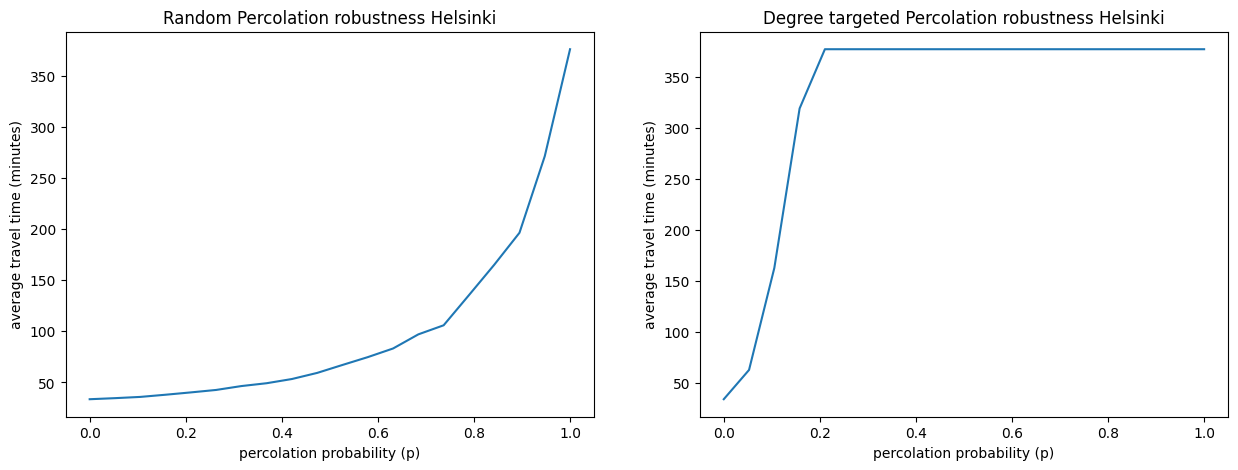

In [11]:
# plot two plots next to each other
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
# plot first plot
x = results.groupby("p").mean().reset_index()["p"]
# divide y by 60 to get minutes
y = results.groupby("p").mean().reset_index()["result"]/60
# set x and y label
ax1.set_xlabel("percolation probability (p)")
ax1.set_ylabel("average travel time (minutes)")
ax1.set_title("Random Percolation robustness Helsinki")
ax1.plot(x, y)

# plot second plot
x = results_betweenness.groupby("p").mean().reset_index()["p"]
# divide y by 60 to get minutes
y = results_betweenness.groupby("p").mean().reset_index()["result"]/60
# set x and y label
ax2.set_xlabel("percolation probability (p)")
ax2.set_ylabel("average travel time (minutes)")
ax2.set_title("Degree targeted Percolation robustness Helsinki")
ax2.plot(x, y)
plt.show()

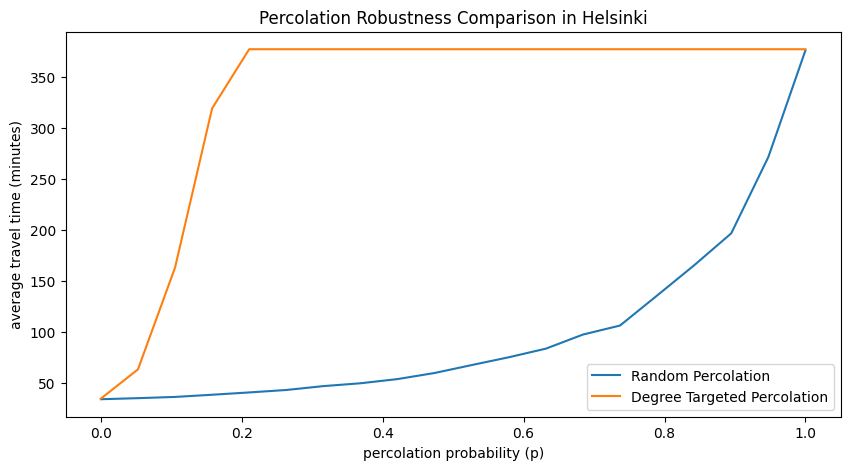

In [12]:
# plot both lines on the same graph
fig, ax = plt.subplots(figsize=(10, 5))

# plot first line
x1 = results.groupby("p").mean().reset_index()["p"]
y1 = results.groupby("p").mean().reset_index()["result"] / 60
ax.plot(x1, y1, label="Random Percolation")

# plot second line
x2 = results_betweenness.groupby("p").mean().reset_index()["p"]
y2 = results_betweenness.groupby("p").mean().reset_index()["result"] / 60
ax.plot(x2, y2, label="Degree Targeted Percolation")

# set x and y labels
ax.set_xlabel("percolation probability (p)")
ax.set_ylabel("average travel time (minutes)")

# set title
ax.set_title("Percolation Robustness Comparison in Helsinki")

# add legend
ax.legend()

# display the plot
plt.show()